# **Machine Learning / Prédiction Genres**

## **Imports et Dataframes**

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

from joblib import dump
from joblib import load

import warnings

In [91]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [92]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [5]:
df = pd.read_csv('../data/data_110k_lignes.csv')

the_dfs = []

In [ ]:
df

,Unnamed: 0,artist_name,album_name,album_id,track_name,track_id,popularity,release_date,duration_ms,explicit,external_urls,is_local,preview_url,track_number,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms.1,time_signature
0,0,Gen Hoshino,Comedy,41ERrwfzos93Xlf6hFBiDn,Comedy,5SuOikwiRyPMVoIQDJUgSV,66,2022-04-08,230666,False,https://open.spotify.com/track/5SuOikwiRyPMVoI...,False,https://p.scdn.co/mp3-preview/56ee6d51af5c3a28...,1,acoustic,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,audio_features,5SuOikwiRyPMVoIQDJUgSV,spotify:track:5SuOikwiRyPMVoIQDJUgSV,https://api.spotify.com/v1/tracks/5SuOikwiRyPM...,https://api.spotify.com/v1/audio-analysis/5SuO...,230667,4
1,1,Ray LaMontagne,I Was Born To Love You,7cwHkTgTHLbCUFB6hRi9QQ,I Was Born To Love You,3PG6V5yuFfo4APiovOQoRv,64,2022-04-08,265843,False,https://open.spotify.com/track/3PG6V5yuFfo4APi...,False,https://p.scdn.co/mp3-preview/46ff8588929ba7bd...,1,acoustic,0.650,0.271,9,-11.081,1,0.0314,0.7940,0.000069,0.1960,0.2100,78.036,audio_features,3PG6V5yuFfo4APiovOQoRv,spotify:track:3PG6V5yuFfo4APiovOQoRv,https://api.spotify.com/v1/tracks/3PG6V5yuFfo4...,https://api.spotify.com/v1/audio-analysis/3PG6...,265843,4
2,2,Steve Moakler,Make A Little Room,457Ok9pnF5fAfG7lNUFqHS,Make A Little Room,62yXckrKNy9Sylka6oifst,53,2022-08-12,180493,False,https://open.spotify.com/track/62yXckrKNy9Sylk...,False,https://p.scdn.co/mp3-preview/5dcabbd94b669a08...,1,acoustic,0.758,0.722,1,-6.252,1,0.0511,0.1650,0.000006,0.1060,0.6600,146.031,audio_features,62yXckrKNy9Sylka6oifst,spotify:track:62yXckrKNy9Sylka6oifst,https://api.spotify.com/v1/tracks/62yXckrKNy9S...,https://api.spotify.com/v1/audio-analysis/62yX...,180493,4
3,3,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Steady Love,6UOkF086zUgYXnqFxqUvEI,55,2022-03-11,224333,False,https://open.spotify.com/track/6UOkF086zUgYXnq...,False,https://p.scdn.co/mp3-preview/173b473ca21bbc2c...,4,acoustic,0.678,0.277,11,-10.537,1,0.0602,0.8430,0.000004,0.1040,0.2380,76.935,audio_features,6UOkF086zUgYXnqFxqUvEI,spotify:track:6UOkF086zUgYXnqFxqUvEI,https://api.spotify.com/v1/tracks/6UOkF086zUgY...,https://api.spotify.com/v1/audio-analysis/6UOk...,224333,4
4,4,Ben Rector,The Joy of Music,1l4VD485oDSJM23eWJEWJN,Living My Best Life,0R7EWhquaAICmyE5MZqt3q,54,2022-03-11,215213,False,https://open.spotify.com/track/0R7EWhquaAICmyE...,False,https://p.scdn.co/mp3-preview/697c72a3a0750cd9...,3,acoustic,0.566,0.733,4,-5.302,1,0.0699,0.0830,0.000002,0.3620,0.6360,178.828,audio_features,0R7EWhquaAICmyE5MZqt3q,spotify:track:0R7EWhquaAICmyE5MZqt3q,https://api.spotify.com/v1/tracks/0R7EWhquaAIC...,https://api.spotify.com/v1/audio-analysis/0R7E...,215213,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110153,110153,Chris Tomlin,Today's Worship Hits 2022,6QqOjkKHOl1x0WAAOI2EXT,Holy Forever,7eh4rgLpOJALudfzgA3FR4,3,2022-07-29,308066,False,https://open.spotify.com/track/7eh4rgLpOJALudf...,False,https://p.scdn.co/mp3-preview/fc308a7c4a0e15cd...,42,world-music,0.453,0.704,1,-4.620,1,0.0351,0.2260,0.000000,0.1180,0.2710,144.004,audio_features,7eh4rgLpOJALudfzgA3FR4,spotify:track:7eh4rgLpOJALudfzgA3FR4,https://api.spotify.com/v1/tracks/7eh4rgLpOJAL...,https://api.spotify.com/v1/audio-analysis/7eh4...,308067,4
110154,110154,Chris Tomlin,Top 100 Christian Songs,3QQFxmXILFHkXKvU4jLKKn,I See You,1G3kSoHLjchF3Rkmrnqolm,5,2022-02-28,230673,False,https://open.spotify.com/track/1G3kSoHLjchF3Rk...,False,https://p.scdn.co/mp3-preview/bd694731552be6d4...,57,world-music,0.431,0.734,1,-4.561,1,0.0383,0.1210,0.000000,0.1040,0.3630,159.974,audio_features,1G3kSoHLjchF3Rkmrnqolm,spotify:track:1G3kSoHLjchF3Rkmrnqolm,https://api.spotify.com/v1/tracks/1G3kSoHLjchF...,https://api.spotify.com/v1/audio-analysis/1G3k...,230673,4
110155,110155,Passion,Top 100 Christian Songs,3QQFxmXILFHkX

In [95]:
the_dfs.append(pd.read_csv('../data/donnees_genre_2011.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2012.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2012_2.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2013.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2014.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2014_1.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2015.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2016.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre_2016_1.csv'))
the_dfs.append(pd.read_csv('../data/donnees_genre.csv'))

In [96]:
def groupby_track (df, track='id'):

    last_col = ["track_name", "track_id", "artist_name", "release_date", "genre"]
    mean_col = ["duration_ms", "explicit", "track_number", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
    sum_col = df.drop(last_col + mean_col, axis=1).columns

    dict_agg = {}

    dict_agg["popularity"] = 'max'

    for col in last_col:
        dict_agg[f'{col}'] = 'last'

    for col in mean_col:
        dict_agg[f'{col}'] = 'mean'

    for col in sum_col:
        dict_agg[f'{col}'] = 'sum'

    df = df.groupby('track_' + track).agg(dict_agg)
    del df['track_' + track]
    df = df.reset_index()

    return df


def merge_dfs(df_clean, df_merge, track='id'):

    try:
        if df_merge['explicit'][0] == False or df_merge['explicit'][0] == True:
            df_merge['explicit'] = df_merge['explicit'].apply(lambda x : 0 if x == False else 1)
    except:
        print('Pas de colonne : "explicit"')

    df = pd.concat([df_clean, df_merge])

    try:
        df.drop(df[df['track_number'] > 100].index, axis=0, inplace=True)
    except:
        print('Pas de colonne : "track_number"')

    df = df[df_clean.columns]

    df = groupby_track(df, track).reset_index()

    try:
        del df['Unnamed: 0']
    except:
        print('Pas de colonne : "Unnamed: 0"')

    try:
        del df['index']
    except:
        print('Pas de colonne : "index"')

    return df

In [97]:
for the_df in the_dfs:
    df = merge_dfs(df, the_df, track='id')

Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"
Pas de colonne : "Unnamed: 0"


In [ ]:
df

,track_id,popularity,track_name,artist_name,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,album_id,external_urls,is_local,preview_url,type,id,uri,track_href,analysis_url,duration_ms.1
0,000EuyAILWRGm9j2VHMjZj,20.0,Caught Low,Rolling Blackouts Coastal Fever,2022-05-06,punk-rock,234240.0,0.0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.096900,0.001040,0.6570,0.5990,104.123,4.0,Endless Rooms,2inG3MxvNhZYd808mnhbOW,https://open.spotify.com/track/000EuyAILWRGm9j...,False,https://p.scdn.co/mp3-preview/7141d298ef3d3085...,audio_features,000EuyAILWRGm9j2VHMjZj,spotify:track:000EuyAILWRGm9j2VHMjZj,https://api.spotify.com/v1/tracks/000EuyAILWRG...,https://api.spotify.com/v1/audio-analysis/000E...,234240.0
1,000LTtIxSOxfRwpkymNUuG,13.0,If the World Should End Today,Men Without Hats,2022-03-11,synth-pop,243626.0,0.0,4.0,0.511,0.890,7.0,-6.774,0.0,0.0284,0.000768,0.000005,0.1240,0.3830,150.085,4.0,"Again, Pt. 2",0lEzkrDyXqv4PzyNQtk9SN,https://open.spotify.com/track/000LTtIxSOxfRwp...,False,https://p.scdn.co/mp3-preview/53d32c076075a781...,audio_features,000LTtIxSOxfRwpkymNUuG,spotify:track:000LTtIxSOxfRwpkymNUuG,https://api.spotify.com/v1/tracks/000LTtIxSOxf...,https://api.spotify.com/v1/audio-analysis/000L...,243627.0
2,000P80tkjRpk5aWNmyChqW,46.0,Broccoli Fuck - KIMMERCORE‘S RIMMERCORE PIEP F...,GPF,2022-01-31,hardcore,135941.0,1.0,1.0,0.544,0.984,1.0,0.492,1.0,0.2670,0.026900,0.000007,0.8980,0.0400,120.325,3.0,Broccoli Fuck (KIMMERCORE‘S RIMMERCORE PIEP FA...,2SrX4rvrjFikIVHBaP9bac,https://open.spotify.com/track/000P80tkjRpk5aW...,False,https://p.scdn.co/mp3-preview/cededdb60bb715fb...,audio_features,000P80tkjRpk5aWNmyChqW,spotify:track:000P80tkjRpk5aWNmyChqW,https://api.spotify.com/v1/tracks/000P80tkjRpk...,https://api.spotify.com/v1/audio-analysis/000P...,135941.0
3,000VZqvXwT0YNqKk7iG2GS,506.0,Mercy,The Ghost Inside,2014-11-17,metalcore,256478.0,0.0,5.0,0.444,0.991,7.0,-4.167,1.0,0.1330,0.000085,0.000084,0.1200,0.1060,124.016,4.0,Dear YouthDear YouthDear YouthDear YouthDear Y...,75kQjmcR1YnIrBwVW1s4G175kQjmcR1YnIrBwVW1s4G175...,https://open.spotify.com/track/000VZqvXwT0YNqK...,0,https://p.scdn.co/mp3-preview/9b9c0ca4271a3087...,audio_featuresaudio_featuresaudio_featuresaudi...,000VZqvXwT0YNqKk7iG2GS000VZqvXwT0YNqKk7iG2GS00...,spotify:track:000VZqvXwT0YNqKk7iG2GSspotify:tr...,https://api.spotify.com/v1/tracks/000VZqvXwT0Y...,https://api.spotify.com/v1/audio-analysis/000V...,2821258.0
4,000i2HAmCZiNiQ8Cr34GvX,26.0,Hearts Mend,Rome,2022-11-25,industrial,240093.0,0.0,7.0,0.616,0.710,9.0,-6.517,0.0,0.0309,0.194000,0.001430,0.0626,0.4260,100.030,4.0,Hegemonikon - A Journey to the End of Light,5Yhce2yy5ehIY8ZYthSNY3,https://open.spotify.com/track/000i2HAmCZiNiQ8...,False,https://p.scdn.co/mp3-preview/08035e5230ce74f4...,audio_features,000i2HAmCZiNiQ8Cr34GvX,spotify:track:000i2HAmCZiNiQ8Cr34GvX,https://api.spotify.com/v1/tracks/000i2HAmCZiN...,https://api.spotify.com/v1/audio-analysis/000i...,240093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111667,7zyL8fJmloa9zrjpENrTZx,0.0,Phase II,Sore Throat,2022-02-17,grindcore,200785.0,0.0,2.0,0.392,0.984,11.0,-4.934,1.0,0.0647,0.000002,0.799000,0.1350,0.0698,123.566,4.0,Indestroy II,70Z724I1gUNaB1CW0rbaGu,https://open.spotify.com/track/7zyL8fJmloa9zrj...,False,https://p.scdn.co/mp3-preview/efea2d2e0d91d5cc...,audio_features,7zyL8fJmloa9zrjpENrTZx,spotify:track:7zyL8fJmloa9zrjpENrTZx,https://api.spotify.com/v1/tracks/7zyL8fJmloa9...,https://api.spotify.com/v1/audio-analysis/7zyL...,200785.0
111668,7zyWP5wybyAYNC8m6oYY9h,11.0,Space,7 Chakras,2022-10-01,world-music,183047.0,0.0,2.0,0.219,0.306,1.0,-15.525,0.0,0.0325,0.721000,0.964000,0.1280,0.0583,64.281,5.0,Power Meditation Music,1IwGUumARaAytBZ1J0ZDeH,https://open.spotify.com/track/7zyWP5wybyAYNC8...,False,https://p.scdn.co/mp3-previe

## **Audio_analysis**

In [167]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = '78e434819ce74de2a9da9bd344483f65'
secret = '4bc5580d98ae45f087b511650c3e9d0b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [100]:
df[df['track_id'] == "000EuyAILWRGm9j2VHMjZj"]

,track_id,popularity,track_name,artist_name,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,album_name,album_id,external_urls,is_local,preview_url,type,id,uri,track_href,analysis_url,duration_ms.1
0,000EuyAILWRGm9j2VHMjZj,20.0,Caught Low,Rolling Blackouts Coastal Fever,2022-05-06,punk-rock,234240.0,0.0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.0969,0.00104,0.657,0.599,104.123,4.0,Endless Rooms,2inG3MxvNhZYd808mnhbOW,https://open.spotify.com/track/000EuyAILWRGm9j...,False,https://p.scdn.co/mp3-preview/7141d298ef3d3085...,audio_features,000EuyAILWRGm9j2VHMjZj,spotify:track:000EuyAILWRGm9j2VHMjZj,https://api.spotify.com/v1/tracks/000EuyAILWRG...,https://api.spotify.com/v1/audio-analysis/000E...,234240.0


<h3>track :</h3>
<ul>
<li>'key_confidence'</li>
<li>'mode_confidence'</li>
<li>'tempo_confidence'</li>
</ul>

<h3>bars, tatums, beats  :</h3>
<ul>
<li>'duration' : mean()</li>
<li>'confidence' : mean()</li>
</ul>

<h3>segment :</h3>
<ul>
IMPORTANT: min, max, mean
</ul>


In [147]:
# track_id = '000EuyAILWRGm9j2VHMjZj'

# key_confidence = []
# mode_confidence = []
# tempo_confidence = []

# bars_duration_mean = []
# bars_confidence_mean = []

# tatums_duration_mean = []
# tatums_confidence_mean = []

# beats_duration_mean = []
# beats_confidence_mean = []

# key_confidence.append(sp.audio_analysis(track_id)['track']['key_confidence'])
# mode_confidence.append(sp.audio_analysis(track_id)['track']['mode_confidence'])
# tempo_confidence.append(sp.audio_analysis(track_id)['track']['tempo_confidence'])

# for index in range(len(sp.audio_analysis(track_id)['bars'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['bars'][index]['duration'])
#     len_duration += 1
# bars_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['bars'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['bars'][index]['confidence'])
#     len_confidence += 1
# bars_confidence_mean = (confidence_total / len_confidence)

# for index in range(len(sp.audio_analysis(track_id)['tatums'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['tatums'][index]['duration'])
#     len_duration += 1
# tatums_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['tatums'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['tatums'][index]['confidence'])
#     len_confidence += 1
# tatums_confidence_mean = (confidence_total / len_confidence)

# for index in range(len(sp.audio_analysis(track_id)['beats'])):
#     duration_total = 0
#     len_duration = 0
#     duration_total += float(sp.audio_analysis(track_id)['beats'][index]['duration'])
#     len_duration += 1
# beats_duration_mean = (duration_total / len_duration)

# for index in range(len(sp.audio_analysis(track_id)['beats'])):
#     confidence_total = 0
#     len_confidence = 0
#     confidence_total += float(sp.audio_analysis(track_id)['beats'][index]['confidence'])
#     len_confidence += 1
# beats_confidence_mean = (confidence_total / len_confidence)

## **Nettoyage du dataset**

In [ ]:
super_cats = {
    'acoustic': 'Folk',
    'afrobeat': 'Afrobeat',
    'alt-rock': 'Rock',
    'alternative': 'Indie',
    'ambient': 'New Age',
    'anime': 'World Music',
    'black-metal': 'Heavy Metal',
    'bluegrass': 'Country',
    'blues': 'Blues',
    'bossanova': 'Jazz',
    'brazil': 'Latin',
    'breakbeat': 'Electronic/Dance',
    'british': 'Rock',
    'cantopop': 'World Music',
    'chicago-house': 'Electronic/Dance',
    'children': 'World Music',
    'chill': 'Electronic/Dance',
    'classical': 'Classical',
    'club': 'Electronic/Dance',
    'comedy': 'World Music',
    'country': 'Country',
    'dance': 'Electronic/Dance',
    'dancehall': 'Reggae',
    'death-metal': 'Heavy Metal',
    'deep-house': 'Electronic/Dance',
    'detroit-techno': 'Electronic/Dance',
    'disco': 'Electronic/Dance',
    'disney': 'World Music',
    'drum-and-bass': 'Electronic/Dance',
    'dub': 'Reggae',
    'dubstep': 'Electronic/Dance',
    'edm': 'Electronic/Dance',
    'electro': 'Electronic/Dance',
    'electronic': 'Electronic/Dance',
    'emo': 'Rock',
    'folk': 'Folk',
    'forro': 'Latin',
    'french': 'World Music',
    'funk': 'Funk',
    'garage': 'Electronic/Dance',
    'german': 'World Music',
    'gospel': 'Gospel',
    'goth': 'Rock',
    'grindcore': 'Heavy Metal',
    'groove': 'Funk',
    'grunge': 'Rock',
    'guitar': 'Folk',
    'happy': 'Pop',
    'hard-rock': 'Heavy Metal',
    'hardcore': 'Heavy Metal',
    'hardstyle': 'Electronic/Dance',
    'heavy-metal': 'Heavy Metal',
    'hip-hop': 'Hip-hop/Rap',
    'holidays': 'World Music',
    'honky-tonk': 'Country',
    'house': 'Electronic/Dance',
    'idm': 'Electronic/Dance',
    'indian': 'World Music',
    'indie': 'Indie',
    'indie-pop': 'Pop',
    'industrial': 'Heavy Metal',
    'iranian': 'World Music',
    'j-dance': 'World Music',
    'j-idol': 'World Music',
    'j-pop': 'J-Pop/K-Pop',
    'j-rock': 'Rock',
    'jazz': 'Jazz',
    'k-pop': 'J-Pop/K-Pop',
    'kids': 'World Music',
    'latin': 'Latin',
    'latino': 'Latin',
    'malay': 'World Music',
    'mandopop': 'World Music',
    'metal': 'Heavy Metal',
    'metal-misc': 'Heavy Metal',
    'metalcore': 'Metalcore',
    'minimal-techno': 'Electronic/Dance',
    'movies': 'World Music',
    'mpb': 'Latin',
    'new-age': 'New Age',
    'opera': 'Classical',
    'pagode': 'World Music',
    'party': 'Electronic/Dance',
    'philippines-opm': 'World Music',
    'piano': 'Classical',
    'pop': 'Pop',
    'pop-film': 'Soundtracks',
    'post-dubstep': 'Electronic/Dance',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic/Dance',
    'psych-rock': 'Psychedelic Rock',
    'punk': 'Punk',
    'punk-rock': 'Punk',
    'r-n-b': 'R&B/Soul',
    'rainy-day': 'Indie',
    'reggae': 'Reggae',
    'reggaeton': 'Reggaeton',
    'road-trip': 'Folk',
    'rock': 'Rock',
    'rock-n-roll': 'Rock',
    'rockabilly': 'Rock',
    'romance': 'Pop',
    'sad': 'Indie',
    'salsa': 'Latin',
    'samba': 'Latin',
    'sertanejo': 'Country',
    'show-tunes': 'Soundtracks',
    'singer-songwriter': 'Folk',
    'ska': 'Ska',
    'sleep': 'Electronic/Dance',
    'songwriter': 'Folk',
    'soul': 'R&B/Soul',
    'soundtracks': 'Soundtracks',
    'spanish': 'Latin',
    'study': 'Classical',
    'summer': 'Pop',
    'swedish': 'Pop',
    'synth-pop': 'Electronic/Dance',
    'tango': 'Latin',
    'techno': 'Electronic/Dance',
    'trance': 'Electronic/Dance',
    'trip-hop': 'Electronic/Dance',
    'turkish': 'World Music',
    'work-out': 'Electronic/Dance',
    'world-music': 'World Music'
    }

In [ ]:
def clean_df(df):
    df = df[df[['genre', 'track_id']].duplicated() == False]
    df.drop(df.select_dtypes('object').drop(['genre', "track_name", "track_id", "release_date"], axis=1).columns, axis=1, inplace=True)
    
    try:
        df['explicit'] = df['explicit'].apply(lambda x : 1 if x == True else 0)
    except:
        df['explicit'] = 2

    df.drop(df[df['track_number'] > 100].index, axis=0, inplace=True)
        
    try:
        del df['is_local']
    except:
        print('Pas de colonne : is_local')
        
    try:
        del df['duration_ms.1']
    except:
        print('Pas de colonne : duration_ms.1')

    df = df.dropna(axis=0)
    df = df.drop_duplicates()

    df.drop(['track_name'], axis=1, inplace=True)
    
    df['release_date'] = df['release_date'].apply(lambda x : x[:4])
    df['release_date'] = df['release_date'].apply(lambda x : int(x))

    df['genre'] = df['genre'].apply(lambda x : super_cats[x])

    del df['popularity']

    return df

In [ ]:
df = clean_df(df)

df

Pas de colonne : is_local


,popularity,release_date,genre,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,20.0,2022,Punk,234240.0,0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.096900,0.001040,0.6570,0.5990,104.123,4.0
1,13.0,2022,Electronic/Dance,243626.0,0,4.0,0.511,0.890,7.0,-6.774,0.0,0.0284,0.000768,0.000005,0.1240,0.3830,150.085,4.0
2,46.0,2022,Heavy Metal,135941.0,1,1.0,0.544,0.984,1.0,0.492,1.0,0.2670,0.026900,0.000007,0.8980,0.0400,120.325,3.0
3,506.0,2014,Metalcore,256478.0,0,5.0,0.444,0.991,7.0,-4.167,1.0,0.1330,0.000085,0.000084,0.1200,0.1060,124.016,4.0
4,26.0,2022,Heavy Metal,240093.0,0,7.0,0.616,0.710,9.0,-6.517,0.0,0.0309,0.194000,0.001430,0.0626,0.4260,100.030,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111667,0.0,2022,Heavy Metal,200785.0,0,2.0,0.392,0.984,11.0,-4.934,1.0,0.0647,0.000002,0.799000,0.1350,0.0698,123.566,4.0
111668,11.0,2022,World Music,183047.0,0,2.0,0.219,0.306,1.0,-15.525,0.0,0.0325,0.721000,0.964000,0.1280,0.0583,64.281,5.0
111669,171.0,2014,World Music,260573.0,0,2.0,0.423,0.360,3.0,-9.458,1.0,0.0372,0.728000,0.000000,0.1050,0.2910,130.576,4.0
111670,78.0,2022,Rock,330666.0,0,6.0,0.374,0.992,0.0,-3.014,0.0,0.1290,0.000006,0.324000,0.1630,0.0599,139.997,4.0


In [ ]:
df['genre'].value_counts()

Electronic/Dance    23629
World Music         17916
Latin                9057
Rock                 8485
Heavy Metal          8113
Pop                  6196
Country              4555
Classical            4307
Folk                 4255
Indie                2631
Soundtracks          2488
New Age              2025
J-Pop/K-Pop          2001
R&B/Soul             1965
Funk                 1812
Reggae               1711
Punk                 1608
Afrobeat             1565
Gospel               1336
Ska                  1124
Hip-hop/Rap          1124
Jazz                 1100
Blues                 764
Metalcore             762
Psychedelic Rock      659
Reggaeton             483
Name: genre, dtype: int64

In [ ]:
del df['track_id']

## **Découpage du dataset**

In [ ]:
X = df.drop(['genre'], axis=1)
y = df['genre']

In [ ]:
X

,release_date,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2022,234240.0,0,4.0,0.451,0.699,6.0,-6.955,0.0,0.0329,0.096900,0.001040,0.6570,0.5990,104.123,4.0
1,2022,243626.0,0,4.0,0.511,0.890,7.0,-6.774,0.0,0.0284,0.000768,0.000005,0.1240,0.3830,150.085,4.0
2,2022,135941.0,1,1.0,0.544,0.984,1.0,0.492,1.0,0.2670,0.026900,0.000007,0.8980,0.0400,120.325,3.0
3,2014,256478.0,0,5.0,0.444,0.991,7.0,-4.167,1.0,0.1330,0.000085,0.000084,0.1200,0.1060,124.016,4.0
4,2022,240093.0,0,7.0,0.616,0.710,9.0,-6.517,0.0,0.0309,0.194000,0.001430,0.0626,0.4260,100.030,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111667,2022,200785.0,0,2.0,0.392,0.984,11.0,-4.934,1.0,0.0647,0.000002,0.799000,0.1350,0.0698,123.566,4.0
111668,2022,183047.0,0,2.0,0.219,0.306,1.0,-15.525,0.0,0.0325,0.721000,0.964000,0.1280,0.0583,64.281,5.0
111669,2014,260573.0,0,2.0,0.423,0.360,3.0,-9.458,1.0,0.0372,0.728000,0.000000,0.1050,0.2910,130.576,4.0
111670,2022,330666.0,0,6.0,0.374,0.992,0.0,-3.014,0.0,0.1290,0.000006,0.324000,0.1630,0.0599,139.997,4.0


In [ ]:
transform = LabelEncoder()
y = transform.fit_transform(y)

y

array([18,  4,  8, ..., 25, 22, 12])

## **Train_set & Test_set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.90, random_state=42, stratify=y)
X_train

,release_date,duration_ms,explicit,track_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
31293,2022,142006.0,1,1.0,0.693,0.385,3.0,-10.566,0.0,0.4180,0.71600,0.000000,0.1840,0.805,143.659,4.0
83766,2022,201551.0,0,14.0,0.689,0.747,9.0,-6.735,1.0,0.1480,0.88000,0.000006,0.0515,0.761,106.929,4.0
89455,2011,335893.0,0,11.0,0.499,0.816,9.0,-3.913,0.0,0.0358,0.23200,0.000000,0.1050,0.275,82.017,4.0
39654,2022,253786.0,0,11.0,0.650,0.965,1.0,-1.719,1.0,0.0460,0.00198,0.026100,0.0317,0.954,127.990,4.0
22663,2022,257243.0,0,1.0,0.681,0.869,0.0,-2.807,1.0,0.0638,0.56100,0.000044,0.1130,0.796,175.974,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63849,2022,195000.0,0,1.0,0.416,0.359,0.0,-10.835,1.0,0.0394,0.55700,0.649000,0.1180,0.233,131.897,4.0
30183,2022,167063.0,1,1.0,0.809,0.483,1.0,-9.349,1.0,0.2880,0.46700,0.000000,0.0992,0.264,100.039,4.0
4004,2022,123956.0,0,1.0,0.596,0.772,6.0,-3.518,0.0,0.3500,0.44400,0.000049,0.1240,0.611,114.493,5.0
19132,2012,168000.0,0,6.0,0.447,0.951,5.0,-3.858,0.0,0.0485,0.00252,0.310000,0.3330,0.277,150.050,4.0


## **Dummy Modèle**

In [ ]:
dummy = DummyClassifier()

In [ ]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.21158667621776503

## **Création des Transformeurs**

In [ ]:
X.dtypes

release_date          int64
duration_ms         float64
explicit              int64
track_number        float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

In [ ]:
except_num_var = ["explicit", "mode", "time_signature"]
cat_var = X.select_dtypes('object').columns
num_var = X.select_dtypes('number').drop(except_num_var, axis=1).columns

cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = RobustScaler()

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        # ('num', num_transformer, num_var),
    ], 
    remainder='passthrough'
)

## **Évaluation**

In [ ]:
model_entraines = []

In [ ]:
def evaluation_ln(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction, average='weighted')

    cm = confusion_matrix(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{cm}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                cv = 4, scoring='f1_weighted',
                                                train_sizes=np.linspace(0.1,1,10))
                                            
    model_entraines.append({'nom' : name, 'model': model, 'f1_score' : score_f1})

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.legend()
    plt.show()

    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transform.inverse_transform(model[-1].classes_))
    dist.plot(xticks_rotation="vertical")
    dist.figure_.set_size_inches(25, 18)
    plt.show()

    
    # plt.figure(figsize=(12,8))
    # sns.clustermap(cm)
    # plt.show()

In [ ]:
def evaluation(model):

    model.fit(X_train,y_train)
    prediction = model.predict(X_test)

    name = model.named_steps.model.__class__.__name__

    score_f1 = f1_score(y_test, prediction, average='weighted')

    cm = confusion_matrix(y_test, prediction)

    print(f'''
        \nNom du modèle : {name}\n
        \nF1 Score : {score_f1}\n
        \nMatrice de confusion : \n{cm}\n
        \nRapport de classification : \n{classification_report(y_test, prediction)}\n
    ''')

    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=transform.inverse_transform(model[-1].classes_))
    dist.plot(xticks_rotation="vertical")
    dist.figure_.set_size_inches(25, 18)
    plt.show()

    # plt.figure(figsize=(12,8))
    # sns.clustermap(cm)
    # plt.show()

## **XgBoost**

- Le premier modèle a obtenu score f1_weighted de 0.29 

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1, learning_rate= 0.25)),
])


        
Nom du modèle : XGBClassifier

        
F1 Score : 0.43143477141305825

        
Matrice de confusion : 
[[  39    0    0    2   40    4    0    3    0    0    0    0    1   24
     0    0    0    0    0    0    0    0   10    0    0   33]
 [   1    1    1    5   20    1    0    0    3    0    0    2    0    5
     0    0    2    0    1    0    0    0   13    0    1   20]
 [   0    0  238    7   32   17    0    0    6    0    1    0   25    8
     0   32   10    0    0    1    0    0    3    0    6   45]
 [   0    0    1  191   23   15    1    0    3    1    5    4    1   73
     0    1    7    0    2    0    0    0   45    2    5   76]
 [   2    1   33   32 1766   19    3    1   78    5   12    9    7   42
     1   13   29    2    3    3    6    3   56    4    3  230]
 [   3    1   18   28   49  123    0    2    3    0    2    2    6   21
     0   11    7    3    0    0    2    0   25    1    8  111]
 [   4    0    0    3   76    3   19    0   28    2    2    0    0   13
   

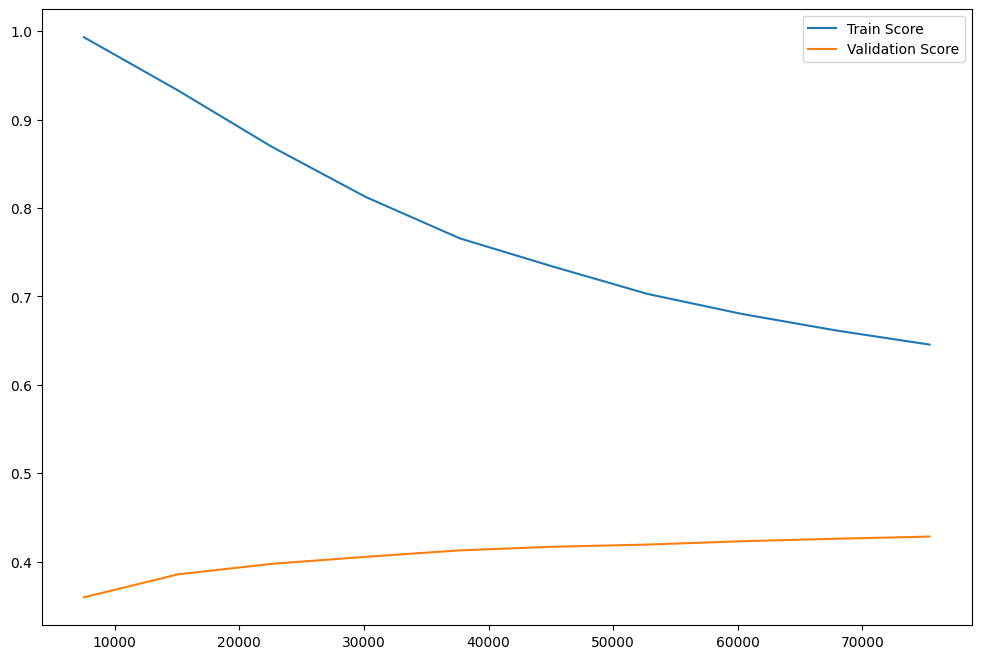

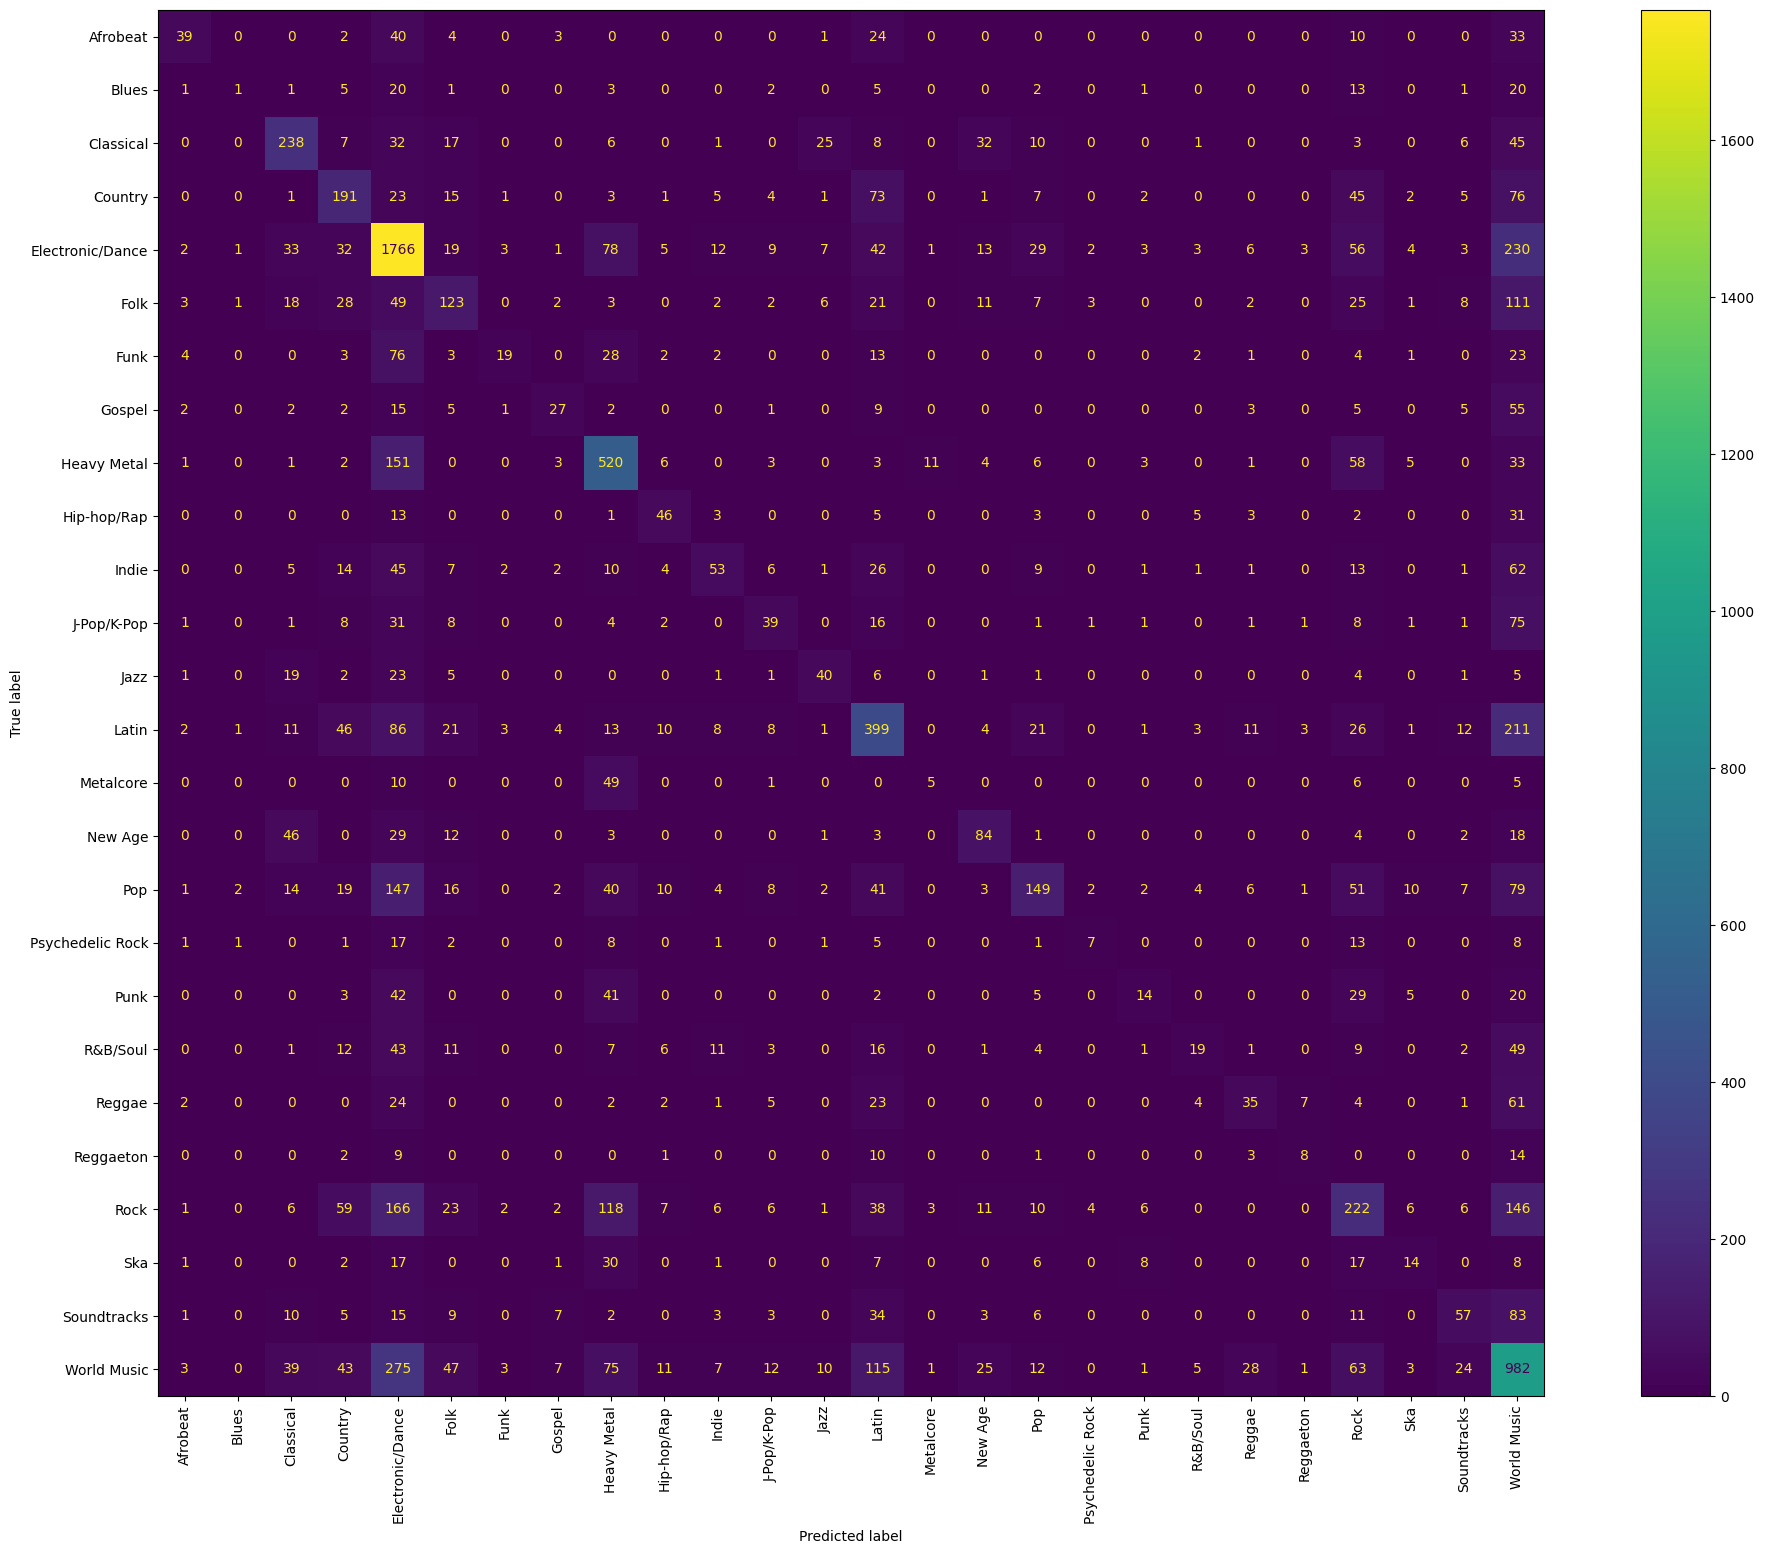

In [ ]:
evaluation_ln(pipe)

## **RandomizedSearchCV**

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [5, 10, 15, None],
    'model__learning_rate': list(np.linspace(0.1, 0.5, 6)),
    'model__n_estimators': list(range(40, 210, 10)),
    'model__gamma': list(np.linspace(0, 1, 5)) + [None],
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END model__gamma=0.75, model__learning_rate=0.1, model__max_depth=None, model__n_estimators=50;, score=0.392 total time=  31.6s
[CV 2/4] END model__gamma=0.75, model__learning_rate=0.1, model__max_depth=None, model__n_estimators=50;, score=0.390 total time=  32.5s
[CV 4/4] END model__gamma=0.75, model__learning_rate=0.1, model__max_depth=None, model__n_estimators=50;, score=0.391 total time=  32.5s
[CV 3/4] END model__gamma=0.75, model__learning_rate=0.1, model__max_depth=None, model__n_estimators=50;, score=0.392 total time=  32.9s
[CV 2/4] END model__gamma=0.5, model__learning_rate=0.33999999999999997, model__max_depth=5, model__n_estimators=90;, score=0.418 total time=  41.6s
[CV 4/4] END model__gamma=0.5, model__learning_rate=0.33999999999999997, model__max_depth=5, model__n_estimators=90;, score=0.423 total time=  41.6s
[CV 1/4] END model__gamma=0.5, model__learning_rate=0.33999999999999997, model__max_depth=5, 

<h3>Résultats du Randomized</h3>
<ul>
<li>Meilleur score : 45.88%, Meilleurs paramètres : {'model__n_estimators': 150, 'model__max_depth': 15, 'model__learning_rate': 0.12222222222222223, 'model__gamma': 0.0}</li><br>
<li>Meilleur score : 45.08%, Meilleurs paramètres : {'model__n_estimators': 112, 'model__max_depth': 15, 'model__learning_rate': 0.18, 'model__gamma': 0.0}</li><br>
<li>Meilleur score : 44.7%, Meilleurs paramètres : {'model__n_estimators': 150, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__gamma': 0.25}</li><br>
<li>Meilleur score : 43.5%, Meilleurs paramètres : {'model__n_estimators': 208, 'model__max_depth': 10, 'model__learning_rate': 0.18, 'model__gamma': 0.5}</li><br>
</ul>

In [ ]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", gamma=0, n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [10, 15, 20, None],
    'model__learning_rate': list(np.linspace(0.1, 0.3, 10)),
    'model__n_estimators': list(range(100, 300, 10)),
}

grid = RandomizedSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 2/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=140;, score=0.453 total time= 2.6min
[CV 3/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=140;, score=0.448 total time= 2.6min
[CV 4/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=140;, score=0.454 total time= 2.6min
[CV 1/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=140;, score=0.453 total time= 2.6min
[CV 2/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=200;, score=0.457 total time= 3.4min
[CV 1/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=200;, score=0.455 total time= 3.5min
[CV 3/4] END model__learning_rate=0.16666666666666666, model__max_depth=10, model__n_estimators=200;, score=0.450 total time= 3.6min
[CV 4/4]

## **GridSearchCV**

In [1]:
pipe = Pipeline([
    ('enc', encoder),
    ('model', XGBClassifier(random_state=42, tree_method="hist", gamma=0, n_jobs=-1)),
])

param_grid = {
    'model__max_depth': [10, 15, 20, 25],
    'model__learning_rate': list(np.linspace(0.1, 0.3, 3)),
    'model__n_estimators': list(range(140, 210, 10)),
}

grid = GridSearchCV(pipe, param_grid, cv=4, scoring='f1_weighted', n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

score = grid.best_score_
score = round(score,4)

params = grid.best_params_

best_model = grid.best_estimator_

print(f"Meilleur score : {round(score * 100, 2)}% \nMeilleurs paramètres : {params}")

NameError: name 'Pipeline' is not defined


        
Nom du modèle : XGBClassifier

        
F1 Score : 0.47228488147964165

        
Matrice de confusion : 
[[  51    0    1    3   35    4    1    3    2    0    2    0    1   15
     0    0    0    0    0    0    0    0    9    0    1   28]
 [   0    9    1    5   19    2    0    0    2    1    0    2    0    3
     0    0    1    0    0    1    0    0   14    1    2   13]
 [   0    0  247    5   26   20    0    0    5    0    0    0   23    7
     0   36   11    0    0    2    0    0    8    0    5   36]
 [   0    1    2  208   23   25    0    2    3    1    5    6    0   57
     0    0   10    0    1    4    0    0   40    0    6   62]
 [   5    0   32   24 1785   21    5    2   68    7   12    8    6   42
     0   13   34    2    6    4    5    1   76    3    2  200]
 [   1    0   18   22   44  147    0    4    5    1    6    4    5   19
     0   10   12    0    0    2    0    0   34    1    7   84]
 [   4    0    0    3   75    1   27    0   23    2    0    0    0    7
   

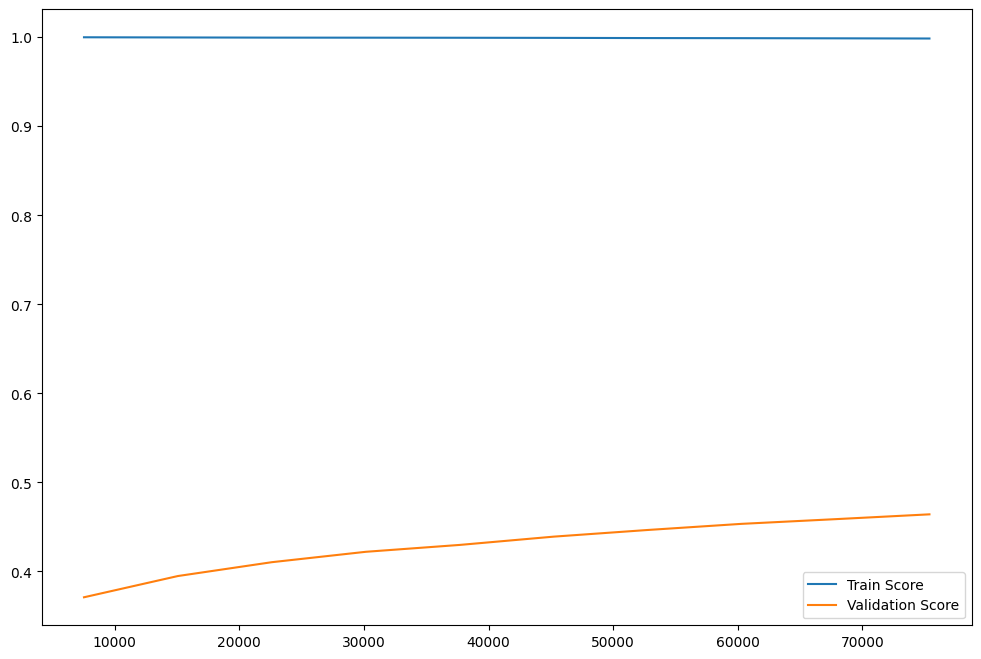

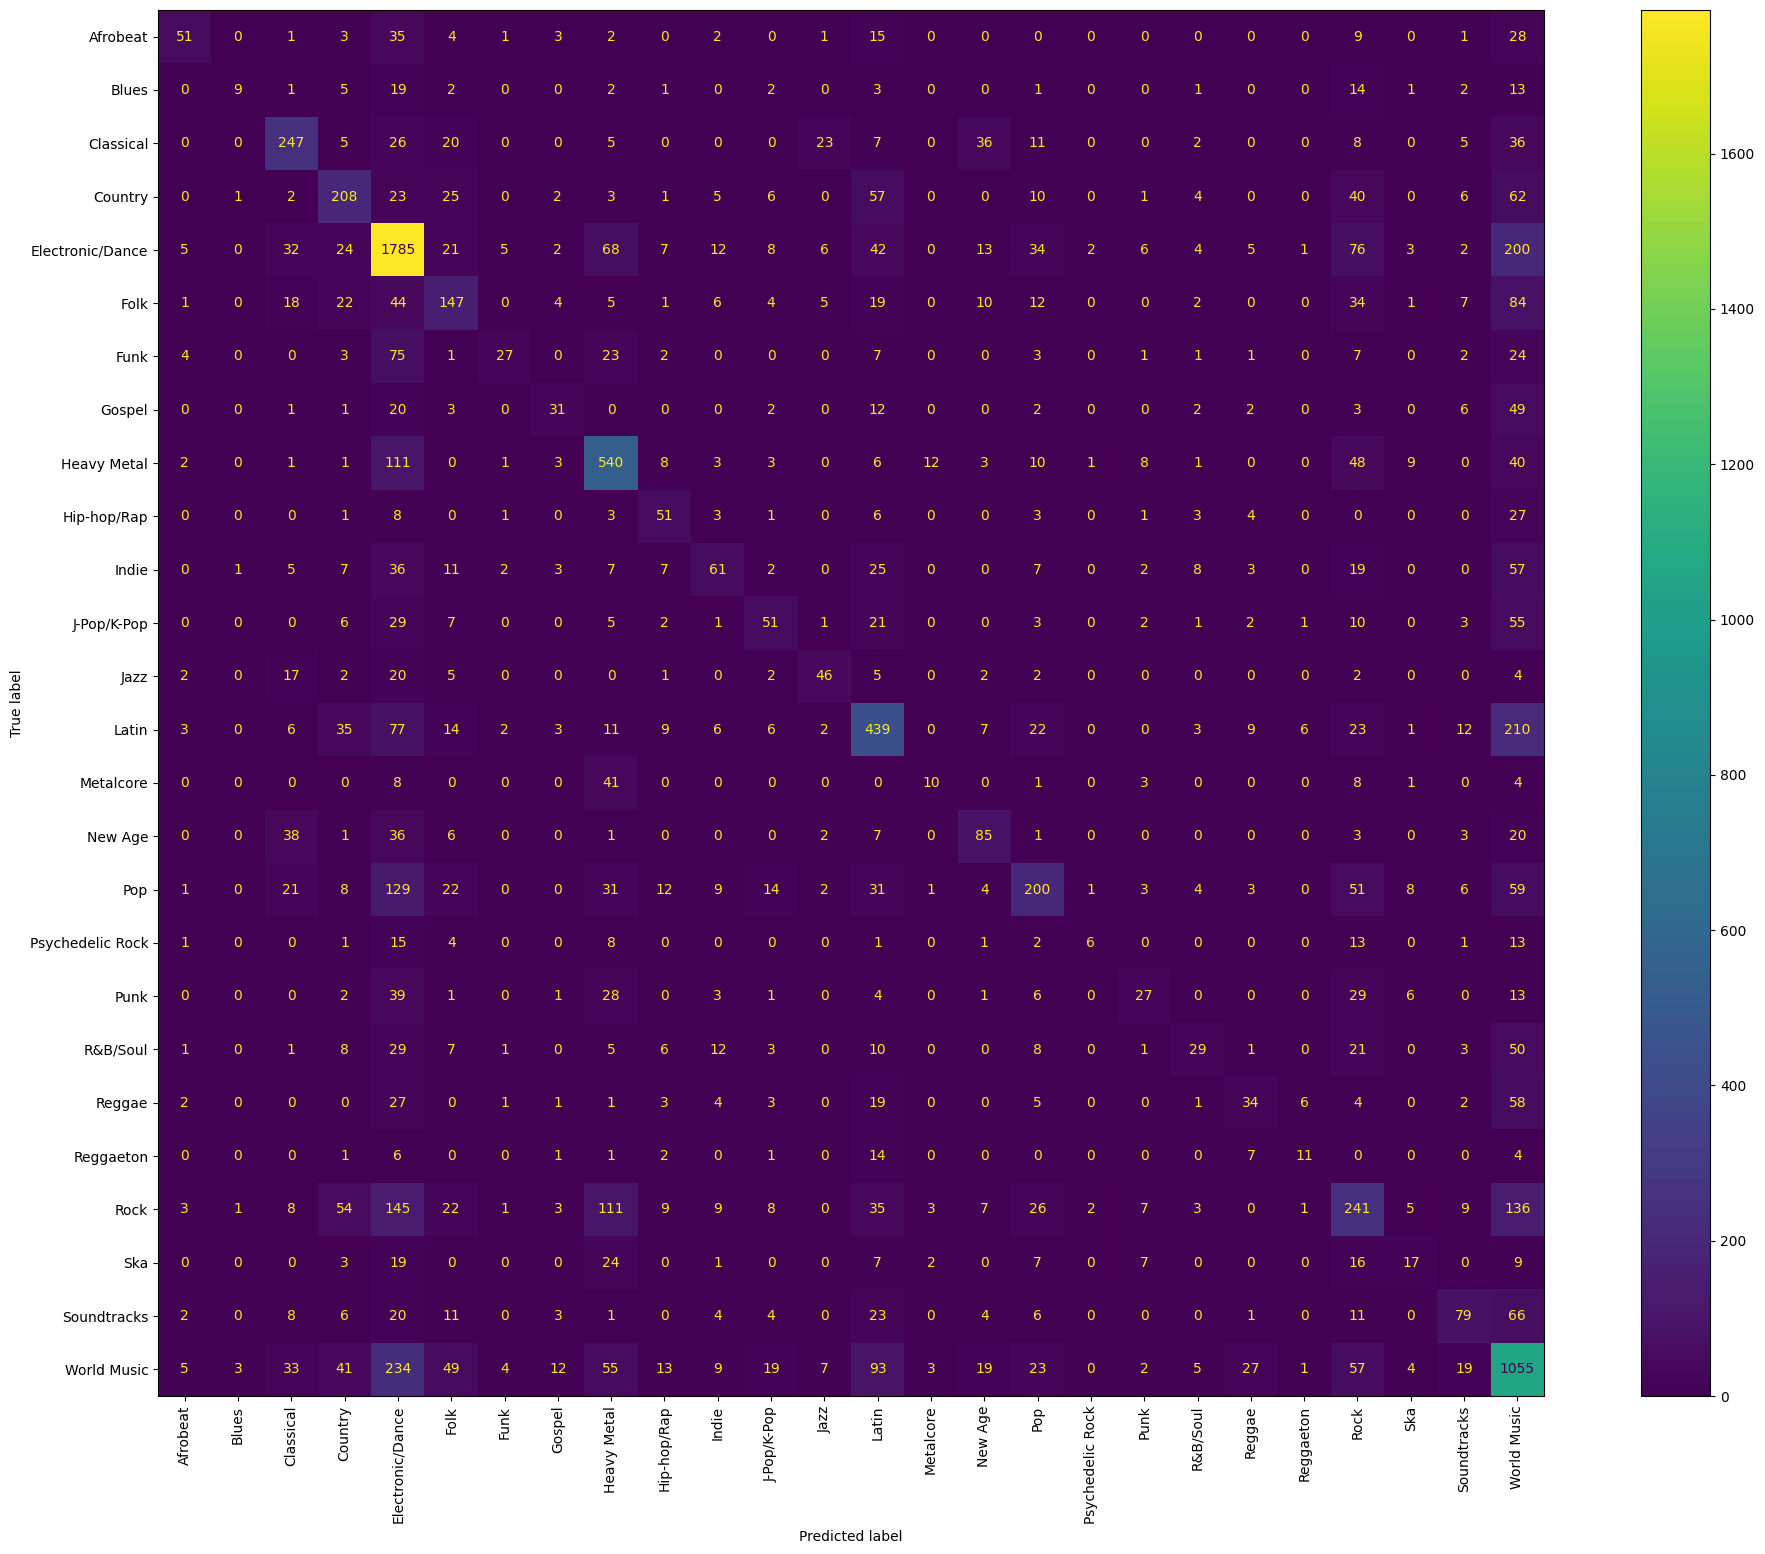

In [31]:
evaluation_ln(best_model)

## **MLFlow**

In [ ]:
import mlflow

In [ ]:
experiment_name = "Modelisation Genre"

In [ ]:
try:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
except AttributeError:
    experiment_id = mlflow.create_experiment(experiment_name)

eval_data = X_test
eval_data["label"] = y_test

with mlflow.start_run(experiment_id=experiment_id, nested=True, run_name=best_model[-1].__class__.__name__):
    mlflow.log_params(best_model[-1].get_params())
    mlflow.sklearn.log_model(best_model, experiment_name)
    model_uri = mlflow.get_artifact_uri(experiment_name)

    result = mlflow.evaluate(
            model_uri,
            eval_data,
            targets="label",
            model_type="regressor",
            evaluators=["default"],
    )